### Introduce with DB
<h3 style="background-color:#009bff; padding:10px; margin: auto 0; border-radius:8px; color:white; text-align:center; font-weight:bold;">
   Data Schema
</h3>

The data is divided in multiple datasets for better understanding and organization. Please refer to the following data schema when working with it:


<img src="image.png" alt="Data schema" style="display: block; max-width: 60%; height: auto; text-align: center;  margin-left: auto; margin-right: auto;">


### Import Libraries

<h3 style="background-color:#009bff; padding:10px; margin: auto 0; border-radius:8px; color:white; text-align:center; font-weight:bold;">
   Import Libraries
</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

### Loading Data

<h3 style="background-color:#009bff; padding:10px; margin: auto 0; border-radius:8px; color:white; text-align:center; font-weight:bold;">
   Loading Data
</h3>

**The function to assign a name for a Dataframe**

In [2]:
def assign_name(df, name):
    df.attrs['name'] = name
    return df

In [3]:

customers = assign_name(pd.read_csv(
    'Data/olist_customers_dataset.csv'), 'customers')
order_items = assign_name(pd.read_csv(
    'Data/olist_order_items_dataset.csv'), 'order_items')
order_payments = assign_name(pd.read_csv(
    'Data/olist_order_payments_dataset.csv'), 'order_payments')
order_reviews = assign_name(pd.read_csv(
    'Data/olist_order_reviews_dataset.csv'), 'order_reviews')
orders = assign_name(pd.read_csv('Data/olist_orders_dataset.csv'), 'orders')
products = assign_name(pd.read_csv(
    'Data/olist_products_dataset.csv'), 'products')
sellers = assign_name(pd.read_csv('Data/olist_sellers_dataset.csv'), 'sellers')

sellers.attrs['name']

'sellers'

In [4]:
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Correct and Reading Data

<h3 style="background-color:#009bff; padding:10px; margin: auto 0; border-radius:8px; color:white; text-align:center; font-weight:bold;">
  Correct and Reading Data  
</h3>

The `get_info` function helps to call general information about the data.

In [5]:
def get_info(data):
    for table in data:
        display(f"There are {table.shape[1]} columns and {
                table.shape[0]} rows in the {table.attrs['name']} dataset.")
        display(f"{table.attrs['name'].upper()} dataset columns {
                list(table.columns)}")

In [6]:
tables = [customers, order_items,
          order_payments, order_reviews, orders, products, sellers]

get_info(tables)

'There are 5 columns and 99441 rows in the customers dataset.'

"CUSTOMERS dataset columns ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']"

'There are 7 columns and 112650 rows in the order_items dataset.'

"ORDER_ITEMS dataset columns ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']"

'There are 5 columns and 103886 rows in the order_payments dataset.'

"ORDER_PAYMENTS dataset columns ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']"

'There are 7 columns and 99224 rows in the order_reviews dataset.'

"ORDER_REVIEWS dataset columns ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']"

'There are 8 columns and 99441 rows in the orders dataset.'

"ORDERS dataset columns ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']"

'There are 9 columns and 32951 rows in the products dataset.'

"PRODUCTS dataset columns ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']"

'There are 4 columns and 3095 rows in the sellers dataset.'

"SELLERS dataset columns ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']"

**Correct the column name**

In [7]:
products.rename(columns={'product_name_lenght': 'product_name_length'}, inplace=True)
products.rename(columns={'product_description_lenght': 'product_description_length'}, inplace=True)

#### Check NAN values

In [8]:
def missing_values(data):
    for table in data:
        print(f"'Missing values in {table.attrs['name']}: {
              table.isna().sum().sum()}")


missing_values(tables)

'Missing values in customers: 0
'Missing values in order_items: 0
'Missing values in order_payments: 0
'Missing values in order_reviews: 145903
'Missing values in orders: 4908
'Missing values in products: 2448
'Missing values in sellers: 0


#### Check duplicates

In [9]:
def check_duplicates(data):
    for table in data:
        print(f"'Duplicate values in {table.attrs['name']}: {table.duplicated().sum()}")


check_duplicates(tables)

'Duplicate values in customers: 0
'Duplicate values in order_items: 0
'Duplicate values in order_payments: 0
'Duplicate values in order_reviews: 0
'Duplicate values in orders: 0
'Duplicate values in products: 0
'Duplicate values in sellers: 0


### Data Cleaning

<h3 style="background-color:#009bff; padding:10px; margin: auto 0; border-radius:8px; color:white; text-align:center; font-weight:bold;">
   Data Cleaning
</h3>

#### Cleaning data

In [10]:
# The function to compare results after data cleaning
def check_missing_values(df_origin, df_cleaned):

    missing_before = df_origin.isna().sum()
    missing_after = df_cleaned.isna().sum()

    comparison_df = pd.DataFrame({
        'Missing Before': missing_before,
        'Missing After': missing_after
    })

    comparison_df['Difference'] = comparison_df['Missing Before'] - \
        comparison_df['Missing After']
    return comparison_df

The function to remove rows with missing values

In [11]:
def remove_missing_values(df,columns):
        df_cleaned = df.dropna(subset=columns)
        return df_cleaned

Remove missing values where specific columns are empty. It helps to save more data.

Orders table - If the order_approved_at date and order_delivered_carrier_date are missing, it requires deletion.

Products table - main fields product_id, product_category_name.

Order reviews table includes many empty comments and titles, so we pay attention on the review_score.

In [12]:
products_cleaned = remove_missing_values(
    products, ['product_id', 'product_category_name'])
orders_cleaned = remove_missing_values(
    orders, ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])
order_reviews_cleaned = remove_missing_values(order_reviews, ['review_score'])

In [13]:
check_missing_values(order_reviews, order_reviews_cleaned)

,Missing Before,Missing After,Difference
review_id,0,0,0
order_id,0,0,0
review_score,0,0,0
review_comment_title,87656,87656,0
review_comment_message,58247,58247,0
review_creation_date,0,0,0
review_answer_timestamp,0,0,0


In [14]:
check_missing_values(orders, orders_cleaned)

,Missing Before,Missing After,Difference
order_id,0,0,0
customer_id,0,0,0
order_status,0,0,0
order_purchase_timestamp,0,0,0
order_approved_at,160,0,160
order_delivered_carrier_date,1783,0,1783
order_delivered_customer_date,2965,0,2965
order_estimated_delivery_date,0,0,0


In [15]:
check_missing_values(products, products_cleaned)

,Missing Before,Missing After,Difference
product_id,0,0,0
product_category_name,610,0,610
product_name_length,610,0,610
product_description_length,610,0,610
product_photos_qty,610,0,610
product_weight_g,2,1,1
product_length_cm,2,1,1
product_height_cm,2,1,1
product_width_cm,2,1,1


#### Fill gaps for missing values

In [16]:
order_reviews_cleaned['review_comment_title'].fillna('No title', inplace=True)
order_reviews_cleaned['review_comment_message'].fillna(
    'No comment', inplace=True)
products_cleaned.fillna("unknown", inplace=True)

In [17]:
check_missing_values(order_reviews, order_reviews_cleaned)

,Missing Before,Missing After,Difference
review_id,0,0,0
order_id,0,0,0
review_score,0,0,0
review_comment_title,87656,0,87656
review_comment_message,58247,0,58247
review_creation_date,0,0,0
review_answer_timestamp,0,0,0


In [18]:
order_reviews_cleaned.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No title,No comment,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No title,No comment,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No title,No comment,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No title,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Merge Data

<h3 style="background-color:#009bff; padding:10px; margin: auto 0; border-radius:8px; color:white; text-align:center; font-weight:bold;">
   Merge Data
</h3>

In [19]:
final_df = orders_cleaned.merge(order_items, on='order_id') \
                         .merge(order_payments, on='order_id') \
                         .merge(order_reviews_cleaned, on='order_id') \
                         .merge(customers, on='customer_id') \
                         .merge(products_cleaned, on='product_id') \
                         .merge(sellers, on='seller_id')
print(f"Final dataset shape: {final_df.shape}")


Final dataset shape: (113217, 39)


We will leave NaT date to save more data for analysis. It's safe but requires additional actions in the further data investigation.)

In [20]:
final_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_nam

### Convert data types

<h3 style="background-color:#009bff; padding:10px; margin: auto 0; border-radius:8px; color:white; text-align:center; font-weight:bold;">
   Convert data types
</h3>

**Convert date columns to datetime type**

In [21]:
# Function to convert to datetime type
def convert_to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')


date_columns = [
    'order_purchase_timestamp', 'order_approved_at', 'shipping_limit_date',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp'
]

convert_to_datetime(final_df, date_columns)

In [22]:
final_df.select_dtypes(include='datetime64[ns]').columns

Index(['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'shipping_limit_date',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

#### Correct numeric types of columns

In [23]:
def convert_to_numeric(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


numeric_columns = ['price', 'freight_value', 'payment_value', 'product_weight_g',
                   'product_length_cm', 'product_height_cm', 'product_width_cm']

convert_to_numeric(final_df, numeric_columns)

#### Convert to categorical types

In [24]:
final_df['payment_type'] = final_df['payment_type'].astype('category')
final_df['order_status'] = final_df['order_status'].astype('category')

#### Create additional columns

In [25]:
# Create additional features for date and products
final_df['order_purchase_date'] = pd.to_datetime(
    final_df['order_purchase_timestamp'])
final_df['day'] = final_df['order_purchase_date'].dt.date
final_df['week'] = final_df['order_purchase_date'].dt.to_period(
    'W').astype(str)
final_df['month'] = final_df['order_purchase_date'].dt.to_period(
    'M').astype(str)
final_df['year'] = final_df['order_purchase_date'].dt.year
final_df["product_volume_cm3"] = (
    final_df["product_length_cm"] *
    final_df["product_width_cm"] * final_df["product_height_cm"]
)

##### Check updated types

In [26]:
final_df.dtypes

order_id                                 object
customer_id                              object
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                        int64
payment_type                           category
payment_installments                      int64
payment_value                           float64
review_id                                object
review_score                              int64
review_comment_title                    

In [27]:
final_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,order_purchase_date,day,week,month,year,product_volume_cm3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,13.0,9350,maua,SP,2017-10-02 10:56:33,2017-10-02,2017-10-02/2017-10-08,2017-10,2017,1976.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,13.0,9350,maua,SP,2017-10-02 10:56:33,2017-10-02,2017-10-02/2017-10-08,2017-10,2017,1976.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,13.0,9350,maua,SP,2017-10-02 10:56:33,2017-10-02,2017-10-02/2017-10-08,2017-10,2017,1976.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,19.0,31570,belo horizonte,SP,2018-07-24 20:41:37,2018-07-24,2018-07-23/2018-07-29,2018-07,2018,4693.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,21.0,14840,guariba,SP,2018-08-08 08:38:49,2018-08-08,2018-08-06/2018-08-12,2018-08,2018,9576.0


### Exploratory Data Analysis - EDA

<h3 style="background-color:#009bff; padding:10px; margin: auto 0; border-radius:8px; color:white; text-align:center; font-weight:bold;">
   Exploratory Data Analysis - EDA
</h3>

General information about our dataset

In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113217 entries, 0 to 113216
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113217 non-null  object        
 1   customer_id                    113217 non-null  object        
 2   order_status                   113217 non-null  category      
 3   order_purchase_timestamp       113217 non-null  datetime64[ns]
 4   order_approved_at              113217 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113217 non-null  datetime64[ns]
 6   order_delivered_customer_date  113217 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113217 non-null  datetime64[ns]
 8   order_item_id                  113217 non-null  int64         
 9   product_id                     113217 non-null  object        
 10  seller_id                      113217 non-null  object        
 11  

In [29]:
final_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,...,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,order_purchase_date,year,product_volume_cm3
count,113217,113217,113217,113217,113217,113217.000000,113217,113217.000000,113217.000000,113217.000000,...,113217.000000,113217.000000,113216.000000,113216.000000,113216.000000,113216.000000,113217.000000,113217,113217.000000,113216.000000
mean,2018-01-01 08:11:28.620869632,2018-01-01 18:37:32.985514752,2018-01-04 14:44:39.380551936,2018-01-13 18:46:21.734606848,2018-01-25 04:13:27.779750400,1.195050,2018-01-07 22:45:51.185025280,119.885763,20.002415,1.090808,...,784.726419,2.206974,2106.346400,30.276922,16.598652,23.099412,24522.992952,2018-01-01 08:11:28.620869632,2017.541950,15305.345190
min,2016-10-03 09:44:50,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-27 00:00:00,1.000000,2016-10-08 10:34:01,0.850000,0.000000,1.000000,...,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,2016-10-03 09:44:50,2016.000000,168.000000
25%,2017-09-13 14:12:25,2017-09-13 22:05:44,2017-09-15 20:07:55,2017-09-25 18:34:40,2017-10-04 00:00:00,1.000000,2017-09-20 13:24:55,39.900000,13.080000,1.000000,...,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,2017-09-13 14:12:25,2017.000000,2856.000000
50%,2018-01-20 10:09:41,2018-01-20 16:00:35,2018-01-24 00:42:07,2018-02-02 02:41:52,2018-02-16 00:00:00,1.000000,2018-01-26 14:15:18,74.900000,16.320000,1.000000,...,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,2018-01-20 10:09:41,2018.000000,6615.000000
75%,2018-05-05 14:32:51,2018-05-05 21:10:36,2018-05-08 14:12:00,2018-05-15 20:08:51,2018-05-28 00:00:00,1.000000,2018-05-10 19:50:42,133.000000,21.190000,1.000000,...,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28495.000000,2018-05-05 14:32:51,2018.000000,18480.000000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,26.000000,...,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,2018-08-29 15:00:37,2018.000000,296208.000000
std,NaN,NaN,NaN,NaN,NaN,0.687471,NaN,181.206843,15.710853,0.686608,...,650.297510,1.718312,3765.034692,16.144080,13.436740,11.734956,27647.461662,NaN,0.504143,23406.726388


In [30]:
final_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,order_purchase_date,day,week,month,year,product_volume_cm3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,13.0,9350,maua,SP,2017-10-02 10:56:33,2017-10-02,2017-10-02/2017-10-08,2017-10,2017,1976.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,13.0,9350,maua,SP,2017-10-02 10:56:33,2017-10-02,2017-10-02/2017-10-08,2017-10,2017,1976.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,13.0,9350,maua,SP,2017-10-02 10:56:33,2017-10-02,2017-10-02/2017-10-08,2017-10,2017,1976.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,19.0,31570,belo horizonte,SP,2018-07-24 20:41:37,2018-07-24,2018-07-23/2018-07-29,2018-07,2018,4693.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,21.0,14840,guariba,SP,2018-08-08 08:38:49,2018-08-08,2018-08-06/2018-08-12,2018-08,2018,9576.0


#### General overview of data

In [31]:
unique_customers = final_df['customer_unique_id'].nunique()
total_orders = final_df['order_id'].nunique()
average_order_value = final_df['payment_value'].mean()
unique_sellers = final_df['seller_id'].nunique()
average_items_per_order = final_df.groupby(
    'order_id')['order_item_id'].count().mean()
average_freight_value = final_df['freight_value'].mean()
max_price = final_df['price'].max()
min_price = final_df['price'].min()
total_items_sold = final_df['order_item_id'].count()

eda_summary_extended = pd.DataFrame({
    'Metric': [
        'Number of unique customers',
        'Total number of orders',
        'Average order value',
        'Number of unique sellers',
        'Average items per order',
        'Average freight value',
        'Maximum product price',
        'Minimum product price',
        'Total items sold'
    ],
    'Value': [
        unique_customers,
        total_orders,
        average_order_value,
        unique_sellers,
        average_items_per_order,
        average_freight_value,
        max_price,
        min_price,
        total_items_sold
    ]
})

eda_summary_extended['Value'] = round(eda_summary_extended['Value'], 2)
eda_summary_extended.head(10)

,Metric,Value
0,Number of unique customers,91485.00
1,Total number of orders,94491.00
2,Average order value,171.59
3,Number of unique sellers,2909.00
4,Average items per order,1.20
5,Average freight value,20.00
6,Maximum product price,6735.00
7,Minimum product price,0.85
8,Total items sold,113217.00


#### Calculate the correlation matrix for numerical columns

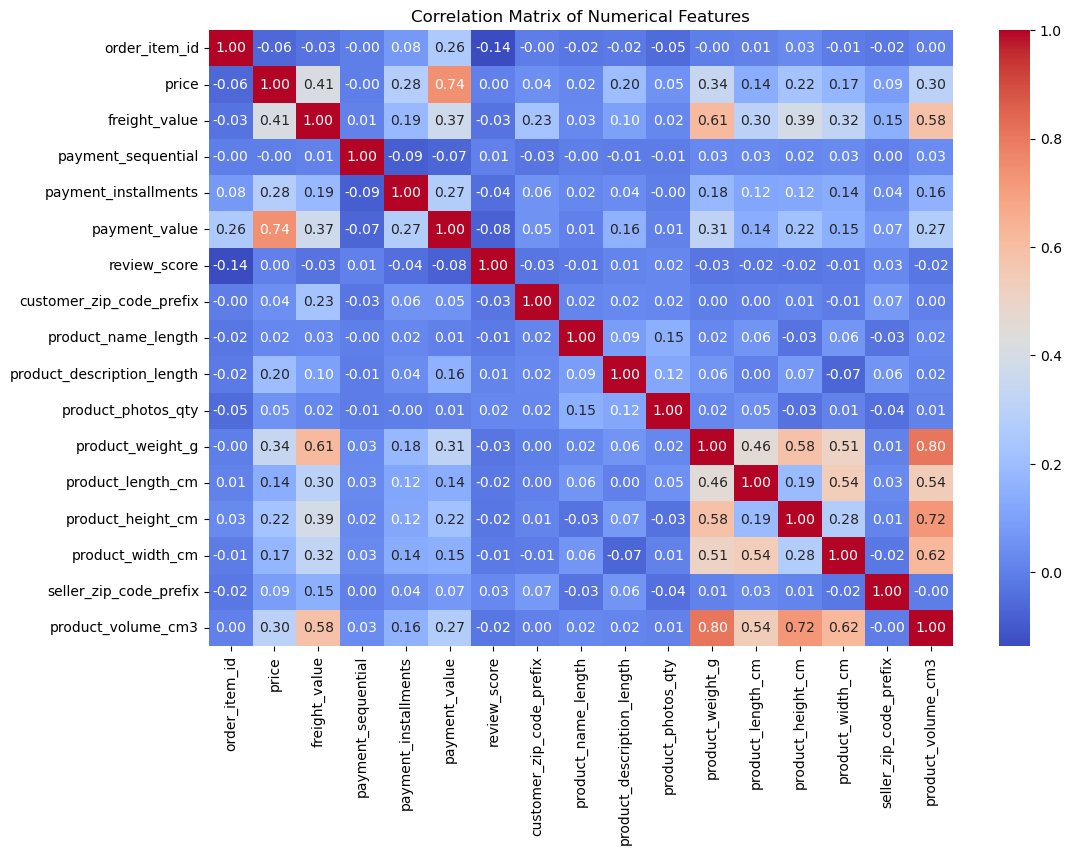

In [32]:
# numerical columns
numerical_columns = final_df.select_dtypes(
    include=['int64', 'float64']).columns

# Calculate the correlation matrix for numerical columns
correlation_matrix = final_df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True,
            fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

#### Comparison Of Number Of Orders And Average Check Per Month

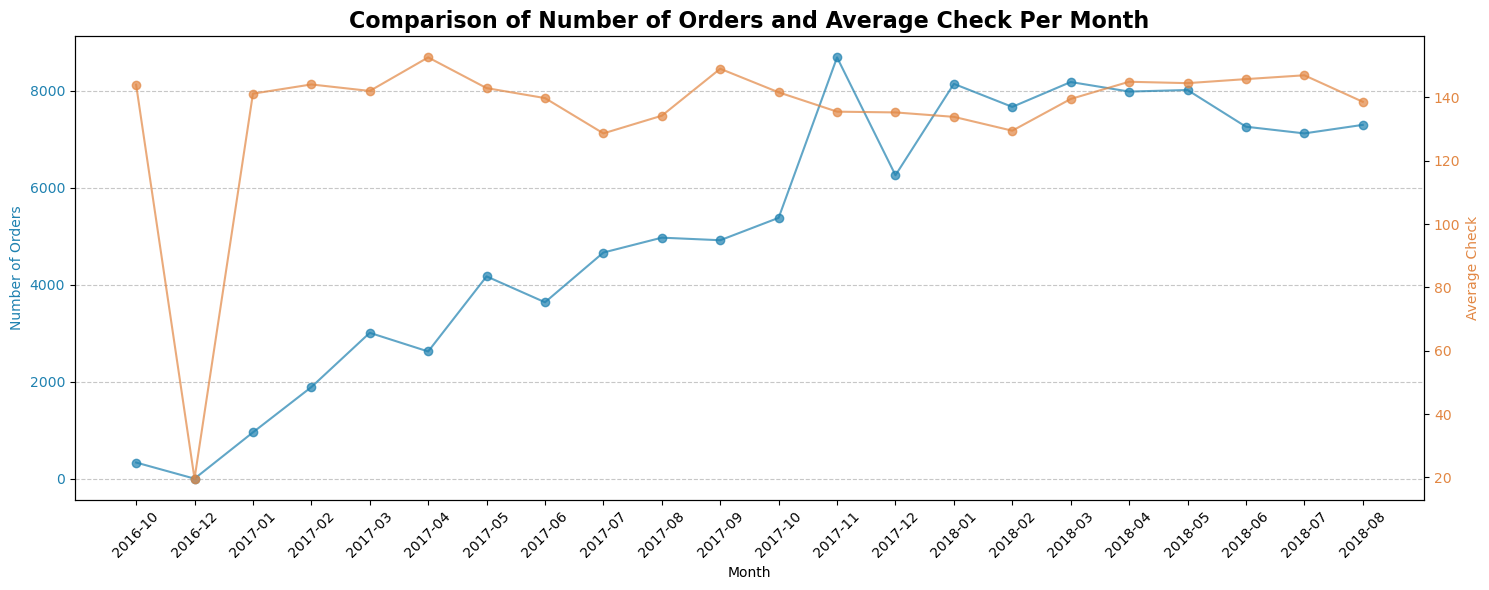

In [33]:
# Extract year and month for monthly aggregation
final_df['order_month'] = final_df['order_purchase_timestamp'].dt.to_period(
    'M')

# Group by order_month and count orders
orders_per_month = final_df.groupby('order_month').size()

# Calculate the average check (price + freight_value) per month
final_df['total_order_value'] = final_df['price'] + final_df['freight_value']
avg_check_per_month = final_df.groupby(
    'order_month')['total_order_value'].mean()

# Plot comparison of number of orders and average check per month
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot number of orders
ax1.plot(orders_per_month.index.astype(str), orders_per_month.values,
         marker='o', label="Number of Orders", color='#1e81b0', alpha=0.7)
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Orders", color='#1e81b0')
ax1.tick_params(axis='y', labelcolor='#1e81b0')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Plot average check
ax2 = ax1.twinx()
ax2.plot(avg_check_per_month.index.astype(str), avg_check_per_month.values,
         marker='o', label="Average Check", color='#e28743', alpha=0.7)
ax2.set_ylabel("Average Check", color='#e28743')
ax2.tick_params(axis='y', labelcolor='#e28743')

# Add title and legend
plt.title("Comparison of Number of Orders and Average Check Per Month",
          fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

> The average check often rises in less active months, perhaps due to expensive goods.

#### Analysis of product categories in the context of weight and volume

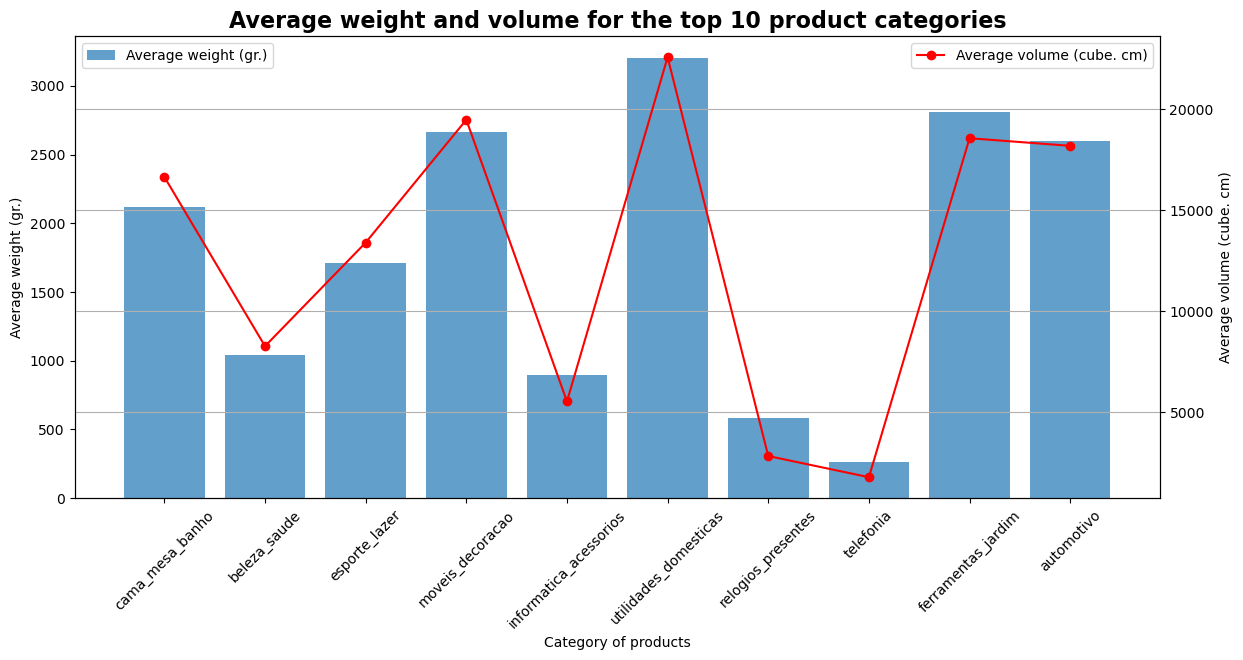

,avg_weight,avg_volume,order_count
product_category_name,,,
cama_mesa_banho,2121.267374,16650.111092,11684
beleza_saude,1042.125141,8271.694840,9749
esporte_lazer,1711.010763,13397.886879,8734
moveis_decoracao,2666.327332,19478.921440,8554
informatica_acessorios,896.146858,5536.164269,7926
utilidades_domesticas,3200.985043,22575.752027,7154
relogios_presentes,582.854063,2834.930846,6030
telefonia,261.366099,1786.203801,4578
ferramentas_jardim,2812.031004,18565.147607,4451


In [34]:
# Analysis of product categories in the context of weight and volume
category_weight_volume = final_df.groupby("product_category_name").agg(
    avg_weight=("product_weight_g", "mean"),
    avg_volume=("product_volume_cm3", "mean"),
    order_count=("product_category_name", "count"),
)

# Sort by number of orders
category_weight_volume = category_weight_volume.sort_values(
    by="order_count", ascending=False)

# Visualization: average weight and volume for the top 10 categories
top_10_categories = category_weight_volume.head(10)

fig, ax1 = plt.subplots(figsize=(14, 6))

# Columns for average weight
ax1.bar(
    top_10_categories.index,
    top_10_categories["avg_weight"],
    label="Average weight (gr.)",
    alpha=0.7,
)
ax1.set_ylabel("Average weight (gr.)")
ax1.set_xlabel("Category of products")
ax1.set_xticklabels(top_10_categories.index, rotation=45)

# Line for average volume
ax2 = ax1.twinx()
ax2.plot(
    top_10_categories.index,
    top_10_categories["avg_volume"],
    color="red",
    label="Average volume (cube. cm)",
    marker="o",
)
ax2.set_ylabel("Average volume (cube. cm)")

# Legend
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.title("Average weight and volume for the top 10 product categories",
          fontsize=16, fontweight='bold')
plt.grid(axis="y")
plt.show()

top_10_categories

#### Total Sales by Payment Type (Pie Chart)

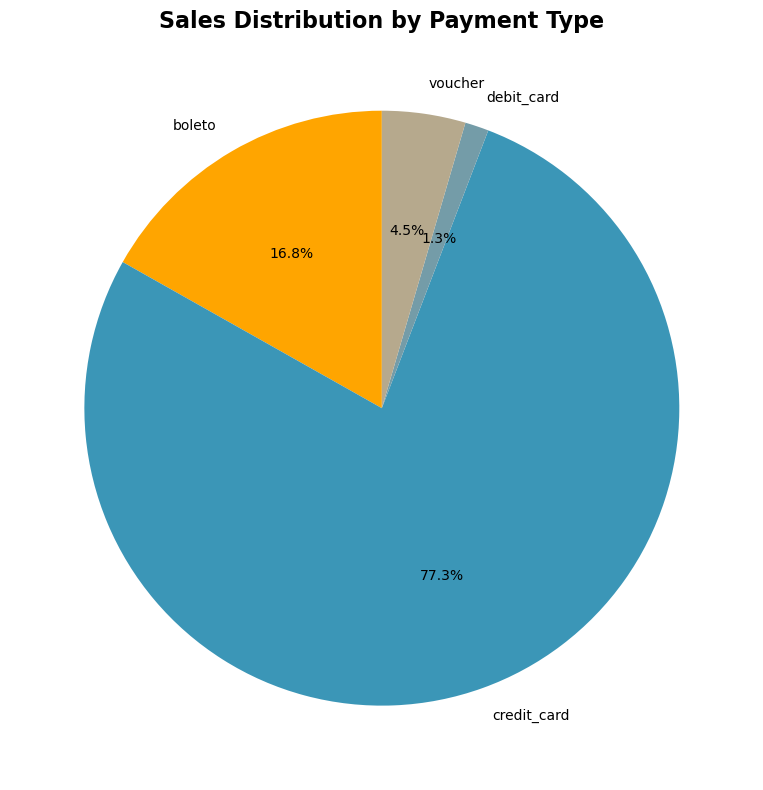

In [35]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Set color palette for Seaborn
colors = ["orange", "#3b96b7", "#749ca8", "#b6a98d", "#873e23", "#1e81b0"]
sns.set_palette(colors)


# Example: Proportion of total sales by payment type
sales_by_payment = final_df.groupby('payment_type')['price'].sum()
sales_by_payment.plot(kind='pie', autopct='%1.1f%%',
                      startangle=90, colors=colors)

# Adding title
plt.title('Sales Distribution by Payment Type', fontsize=16, fontweight='bold')

# Hide the y-label
plt.ylabel('')

plt.tight_layout()
plt.show()

In [36]:
final_df.head(100000).to_csv('final_df_sample.csv', index=False)

### TOP 10 products analysis

#### Prepare data for analysis

In [37]:
# Grouping by product
product_metrics = final_df.groupby('product_category_name').agg({
    'order_item_id': 'count',  # Number of sales
    'price': 'sum',           # Total revenue
    'review_score': 'mean',   # Average rating
    'product_weight_g': 'mean',  # Average weight
    'product_volume_cm3': 'mean'  # Average volume
}).reset_index()

# Rename columns for convenience
product_metrics.rename(columns={
    'order_item_id': 'total_sales',
    'price': 'total_revenue',
    'review_score': 'average_rating',
    'product_weight_g': 'average_weight',
    'product_volume_cm3': 'average_volume'
}, inplace=True)

# show result
product_metrics

,product_category_name,total_sales,total_revenue,average_rating,average_weight,average_volume
0,agro_industria_e_comercio,246,81877.58,4.227642,4312.089431,34117.524390
1,alimentos,503,29058.04,4.272366,648.025845,4588.749503
2,alimentos_bebidas,281,16209.92,4.387900,1121.330961,6376.843416
3,artes,205,24011.73,4.073171,1530.604878,14214.790244
4,artes_e_artesanato,24,1814.01,4.125000,1369.875000,8687.458333
...,...,...,...,...,...,...
68,sinalizacao_e_seguranca,198,21274.63,4.060606,3899.282828,31172.232323
69,tablets_impressao_imagem,85,6820.33,4.117647,292.411765,5593.364706
70,telefonia,4578,323490.44,3.995850,261.366099,1786.203801
71,telefonia_fixa,259,55473.50,3.756757,551.227799,4191.660232


#### Display all TOP 10 graphs 

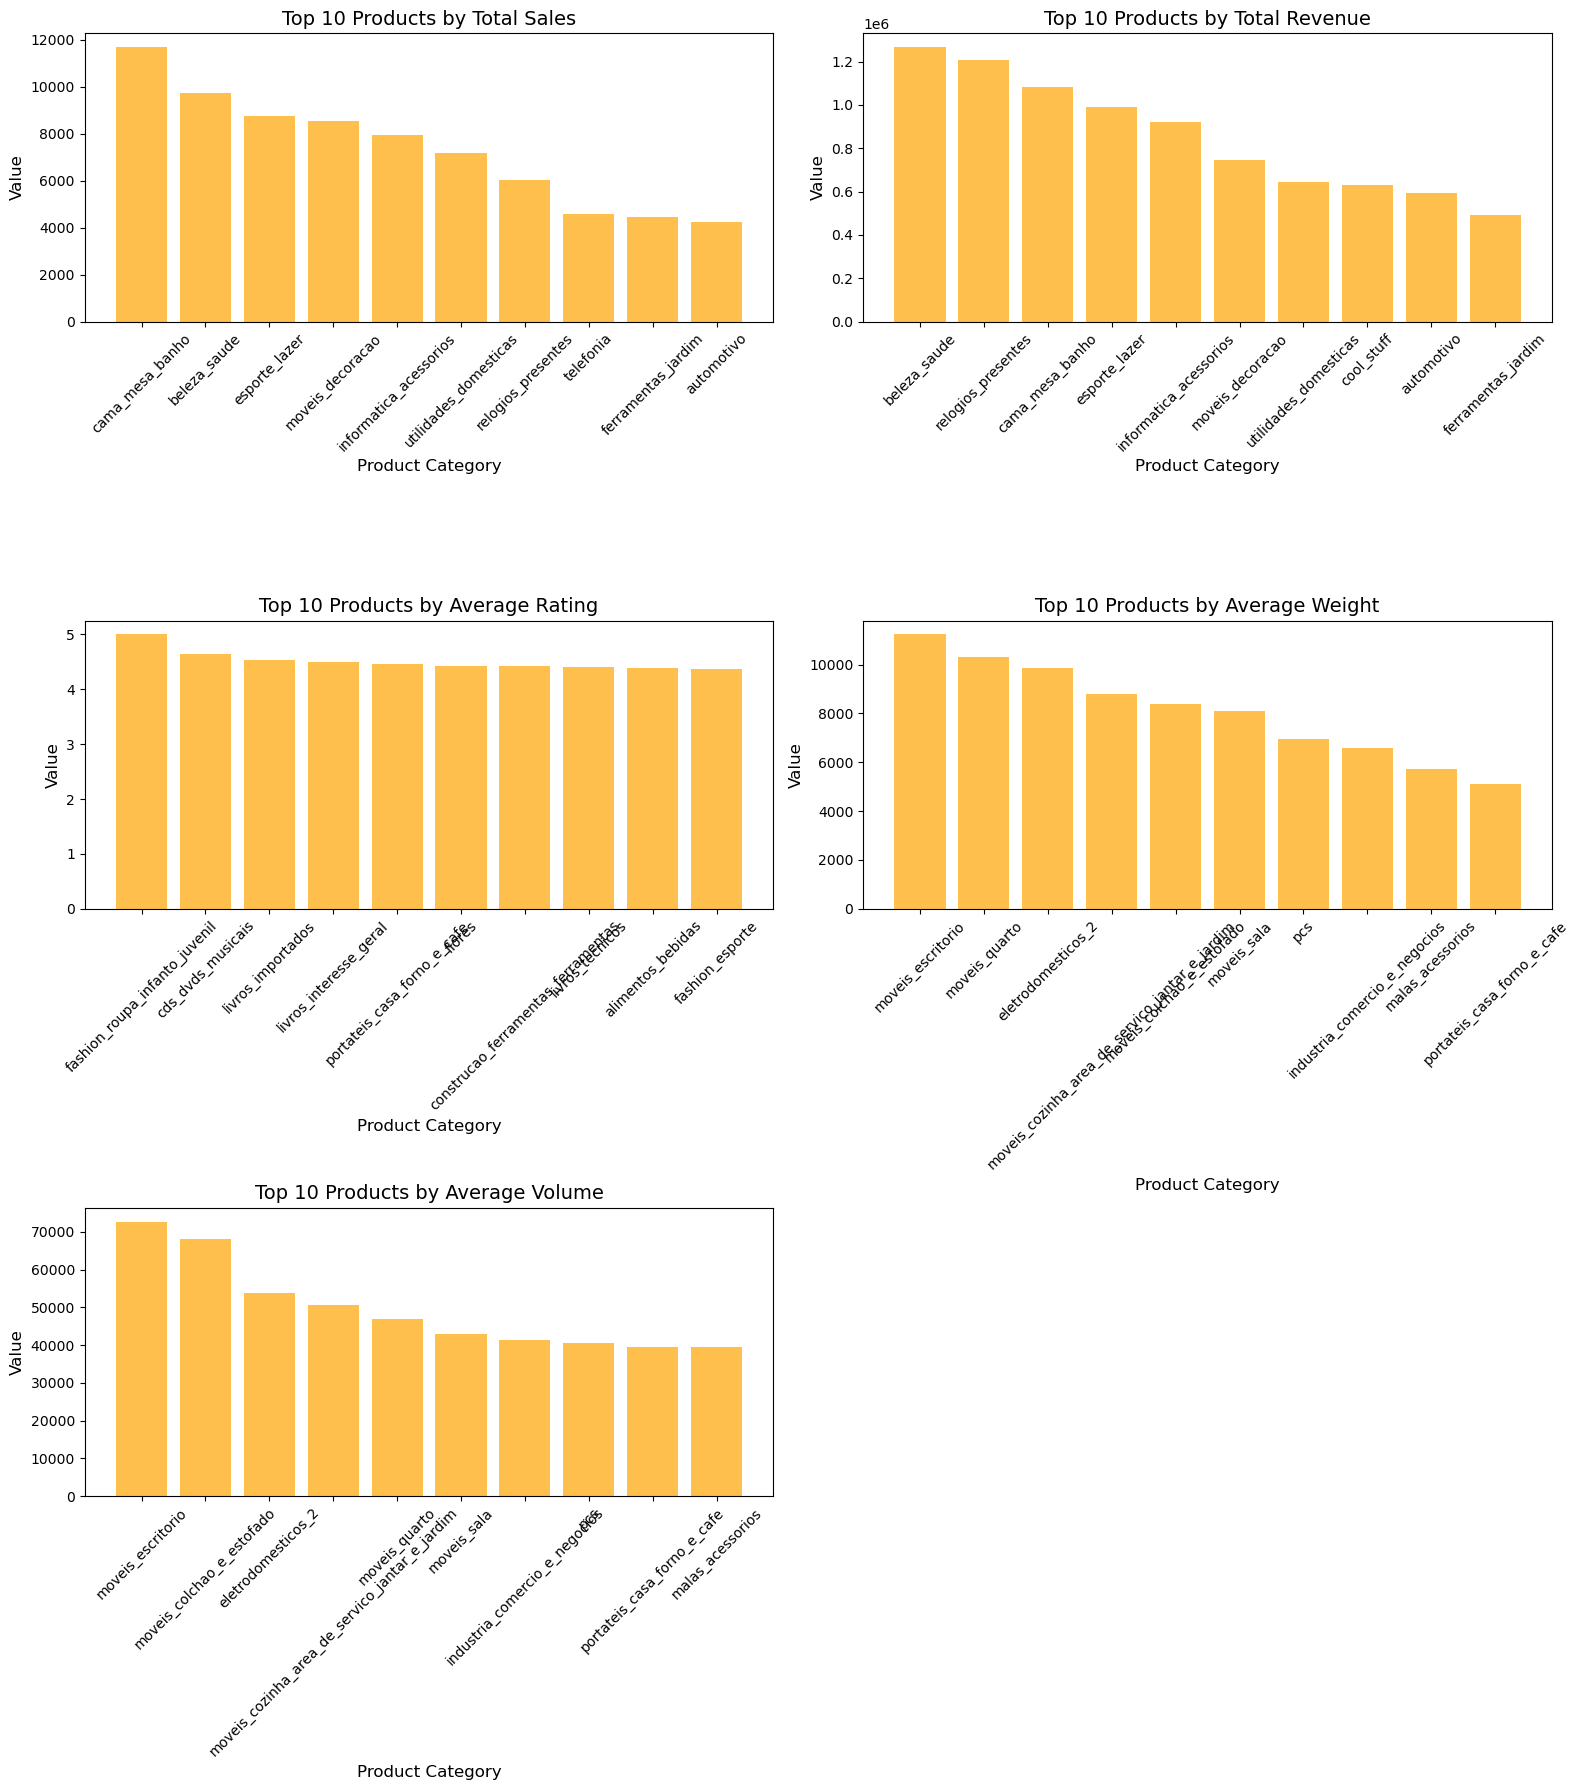

In [38]:
# Function for displaying all top 10 plots

def plot_all_top_10(df):
    metrics = {
        'total_sales': 'Top 10 Products by Total Sales',
        'total_revenue': 'Top 10 Products by Total Revenue',
        'average_rating': 'Top 10 Products by Average Rating',
        'average_weight': 'Top 10 Products by Average Weight',
        'average_volume': 'Top 10 Products by Average Volume'
    }

    fig, axes = plt.subplots(3, 2, figsize=(16, 18))
    axes = axes.flatten()

    for i, (column, title) in enumerate(metrics.items()):
        top_10 = df.nlargest(10, column)
        labels = top_10['product_category_name']
        values = top_10[column]

        axes[i].bar(labels, values, alpha=0.7)
        axes[i].set_title(title, fontsize=14)
        axes[i].set_xlabel('Product Category', fontsize=12)
        axes[i].set_ylabel('Value', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)

    # Remove the last empty subplot if the number of metrics is odd
    if len(metrics) % 2 != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()


# Show results
plot_all_top_10(product_metrics)

#### Calculation of the top 10 products for the period

In [39]:
# Calculation of the top 10 products for the period
def calculate_top_10_by_period(df, period, value_column='order_item_id'):
    period_group = df.groupby([period, 'product_id']).agg({
        value_column: 'count',
        'product_category_name': 'first'
    }).reset_index()
    period_group.rename(columns={value_column: 'total_sales'}, inplace=True)
    return period_group


# Calculate metrics for different periods
top_10_by_day = calculate_top_10_by_period(final_df, 'day')
top_10_by_week = calculate_top_10_by_period(final_df, 'week')
top_10_by_month = calculate_top_10_by_period(final_df, 'month')
top_10_by_year = calculate_top_10_by_period(final_df, 'year')

#### Top 10 products by period(Line Chart)

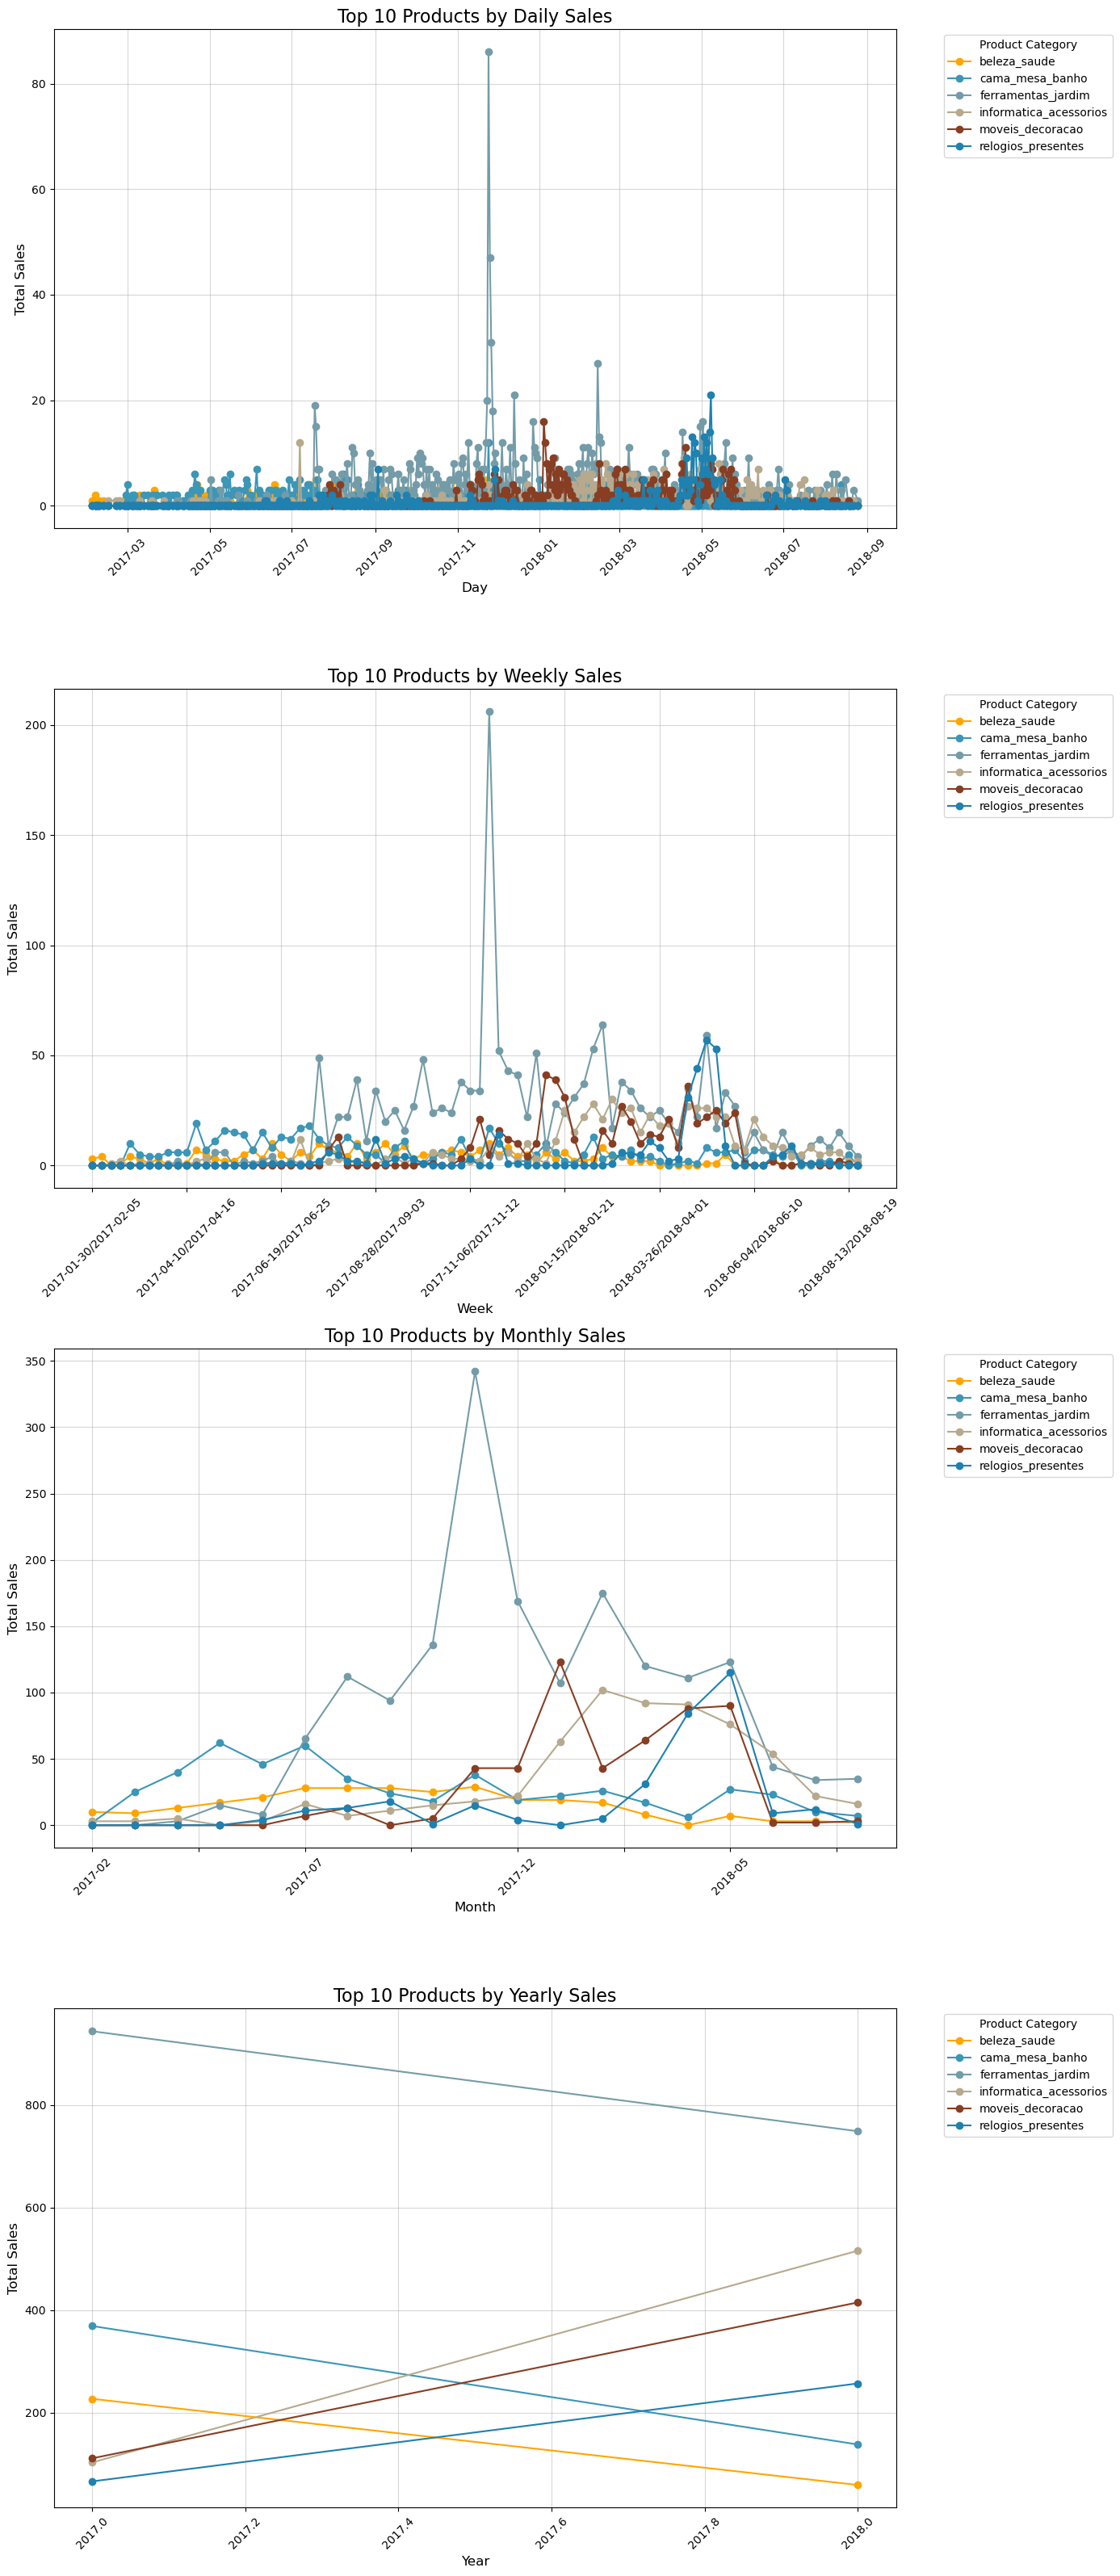

In [40]:
# function to render all graphs at once
def plot_dynamic_top_10_all(df_dict, periods_titles):
    fig, axes = plt.subplots(len(df_dict), 1, figsize=(14, 8 * len(df_dict)))

    for i, (period, (df, title)) in enumerate(periods_titles.items()):
        # Sample top 10 products for the period
        top_products = df.groupby('product_id')[
            'total_sales'].sum().nlargest(10).index
        filtered_df = df[df['product_id'].isin(top_products)]

        pivot_data = filtered_df.pivot_table(
            index=period, columns='product_category_name', values='total_sales', aggfunc='sum', fill_value=0
        )

        # Built the plot
        pivot_data.plot(ax=axes[i], kind='line', marker='o')
        axes[i].set_title(title, fontsize=16)
        axes[i].set_xlabel(period.capitalize(), fontsize=12)
        axes[i].set_ylabel('Total Sales', fontsize=12)
        axes[i].grid(visible=True, alpha=0.5)
        axes[i].legend(title='Product Category',
                       bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


# Use the function to display all graphs
periods_titles = {
    'day': (top_10_by_day, 'Top 10 Products by Daily Sales'),
    'week': (top_10_by_week, 'Top 10 Products by Weekly Sales'),
    'month': (top_10_by_month, 'Top 10 Products by Monthly Sales'),
    'year': (top_10_by_year, 'Top 10 Products by Yearly Sales'),
}

plot_dynamic_top_10_all(periods_titles, periods_titles)

#### Top 10 products by period(Bar Chart)

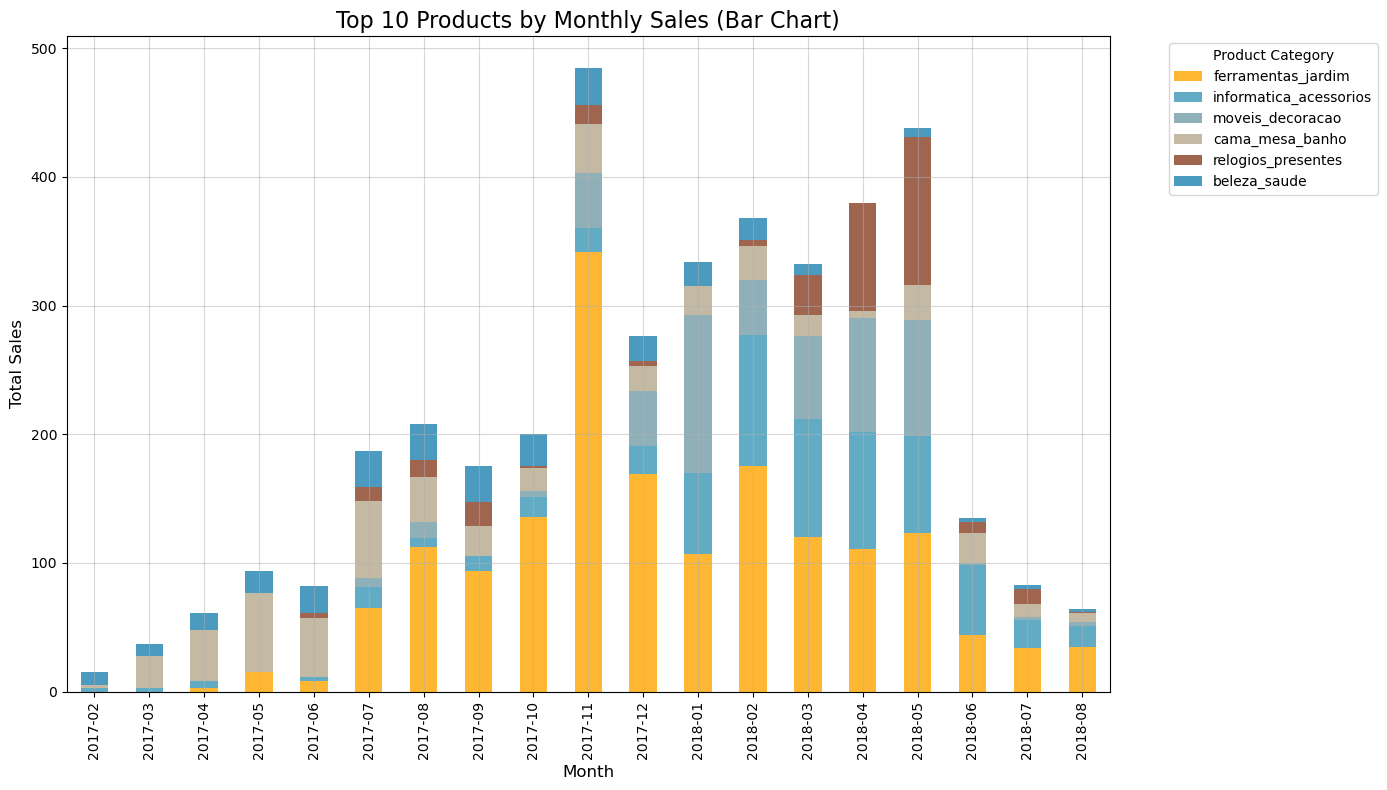

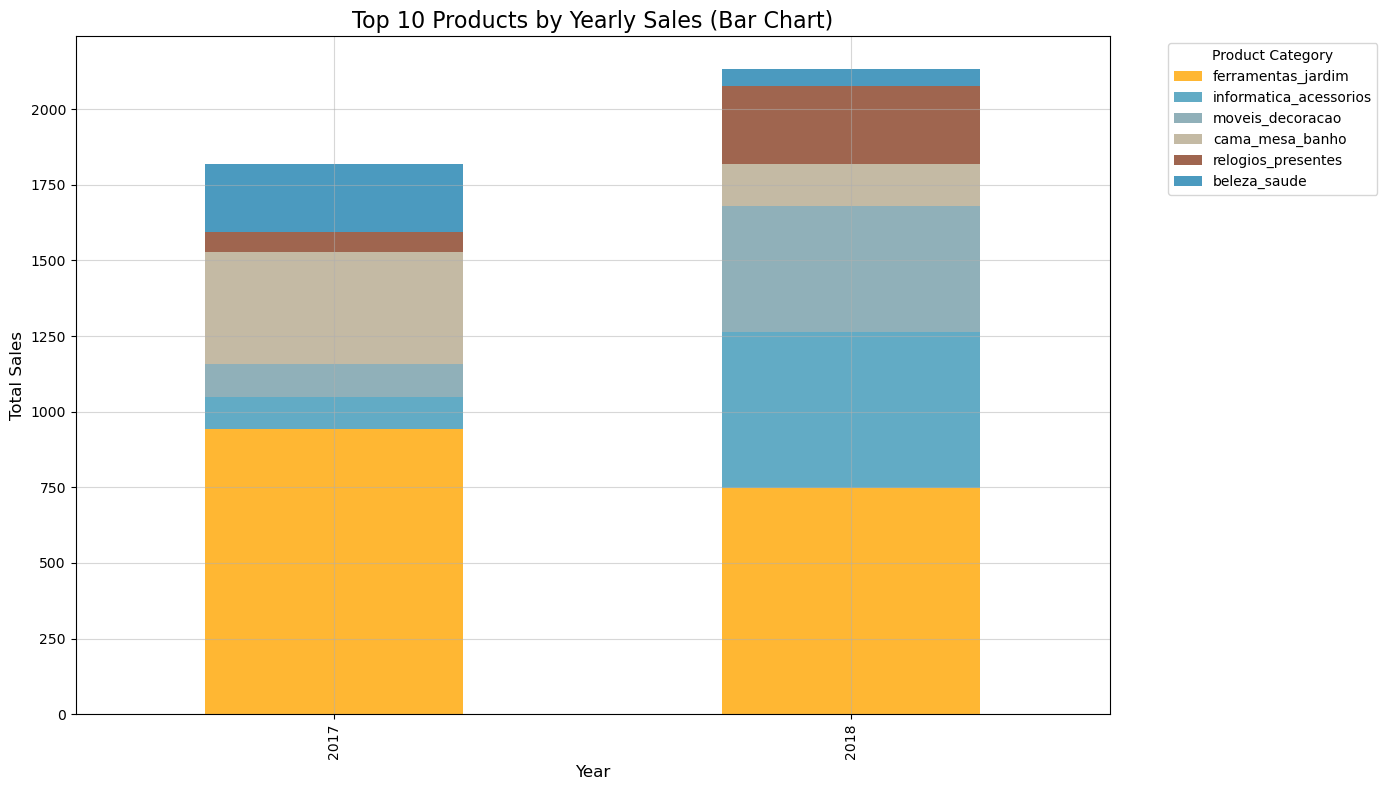

In [41]:
# Function for constructing column graphs of the top 10 products by period
def plot_bar_top_10(df, period, title):
    # Top 10 products by total sales
    top_products = df.groupby('product_id')[
        'total_sales'].sum().nlargest(10).index
    filtered_df = df[df['product_id'].isin(top_products)]

    # Calculate average values for each product by period
    pivot_data = filtered_df.pivot_table(
        index='product_category_name', columns=period, values='total_sales', aggfunc='sum', fill_value=0
    )

    # Total sales figure for sorting categories
    pivot_data['total'] = pivot_data.sum(axis=1)
    pivot_data = pivot_data.sort_values(
        by='total', ascending=False).drop(columns=['total'])

    # Built a plot
    pivot_data.T.plot(kind='bar', figsize=(14, 8), stacked=True, alpha=0.8)
    plt.title(title, fontsize=16)
    plt.xlabel(period.capitalize(), fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.legend(title='Product Category',
               bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(visible=True, alpha=0.5)
    plt.tight_layout()
    plt.show()


# show results
# plot_bar_top_10(top_10_by_day, 'day', 'Top 10 Products by Daily Sales (Bar Chart)')
# plot_bar_top_10(top_10_by_week, 'week', 'Top 10 Products by Weekly Sales (Bar Chart)')
plot_bar_top_10(top_10_by_month, 'month',
                'Top 10 Products by Monthly Sales (Bar Chart)')
plot_bar_top_10(top_10_by_year, 'year',
                'Top 10 Products by Yearly Sales (Bar Chart)')

###  The most relevant Product

<h3 style="background-color:#009bff; padding:10px; margin: auto 0; border-radius:8px; color:white; text-align:center; font-weight:bold;">
   The most relevant Product
</h3>

In [42]:
# We attach product_id to the result from the original DataFrame
product_metrics = product_metrics.merge(
    final_df[['product_id']],  # Замініть original_data на початковий DataFrame
    left_index=True,
    right_index=True,
    how='left'
)

# List of indicators for analysis
metrics = ['total_sales', 'total_revenue',
           'average_rating', 'average_weight', 'average_volume']

# Check for all required columns
for metric in metrics:
    assert metric in product_metrics.columns, f"{
        metric} does not exist DataFrame"

# Normalize data for analysis
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(product_metrics[metrics])
normalized_metrics = pd.DataFrame(normalized_values, columns=[
                                  'sales_score', 'revenue_score', 'rating_score', 'weight_score', 'volume_score'])

# Add normalized data to DataFrame
product_metrics_with_scores = pd.concat(
    [product_metrics.reset_index(drop=True), normalized_metrics], axis=1)

# Calculate the total integral score
product_metrics_with_scores['total_score'] = product_metrics_with_scores[
    ['sales_score', 'revenue_score', 'rating_score', 'weight_score', 'volume_score']
].sum(axis=1)

# Choosing the best product
best_product_updated = product_metrics_with_scores.nlargest(1, 'total_score')[
    ['product_id', 'product_category_name', 'total_score']
]

# show the result
best_product_updated

,product_id,product_category_name,total_score
13,08574b074924071f4e201e151b152b4e,cama_mesa_banho,2.799307


#### Filtering data for the analyzed product

Basic metrics for the product:
                             Value
Total Sales             111.000000
Total Revenue         10504.200000
Average Rating            4.117117
Average Weight (g)     9000.000000
Average Volume (cm3)  19656.000000


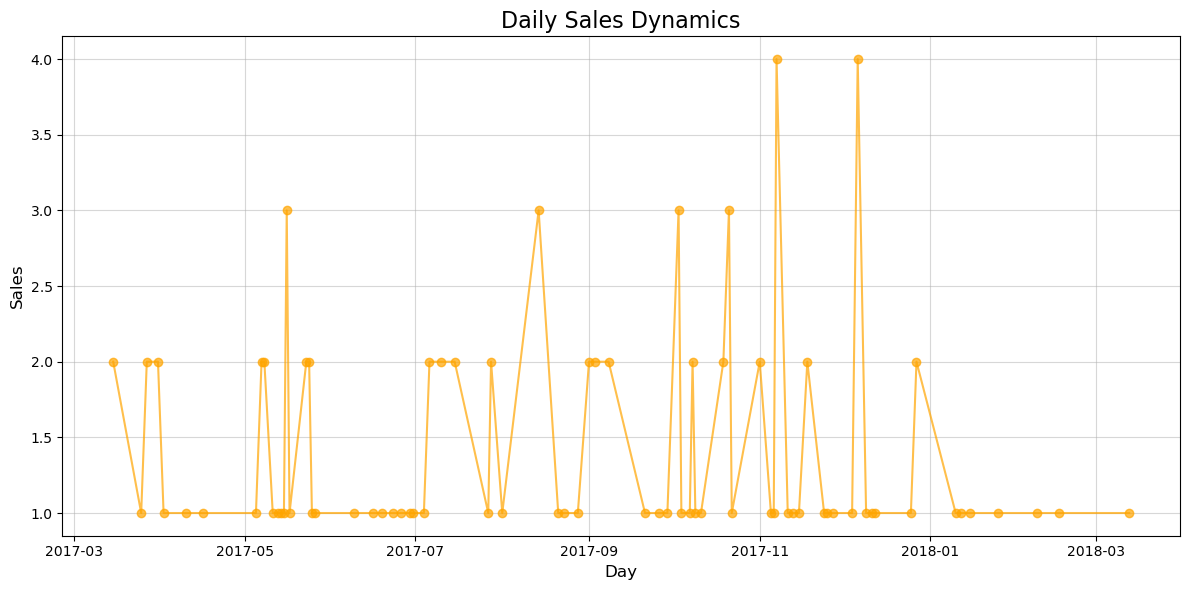

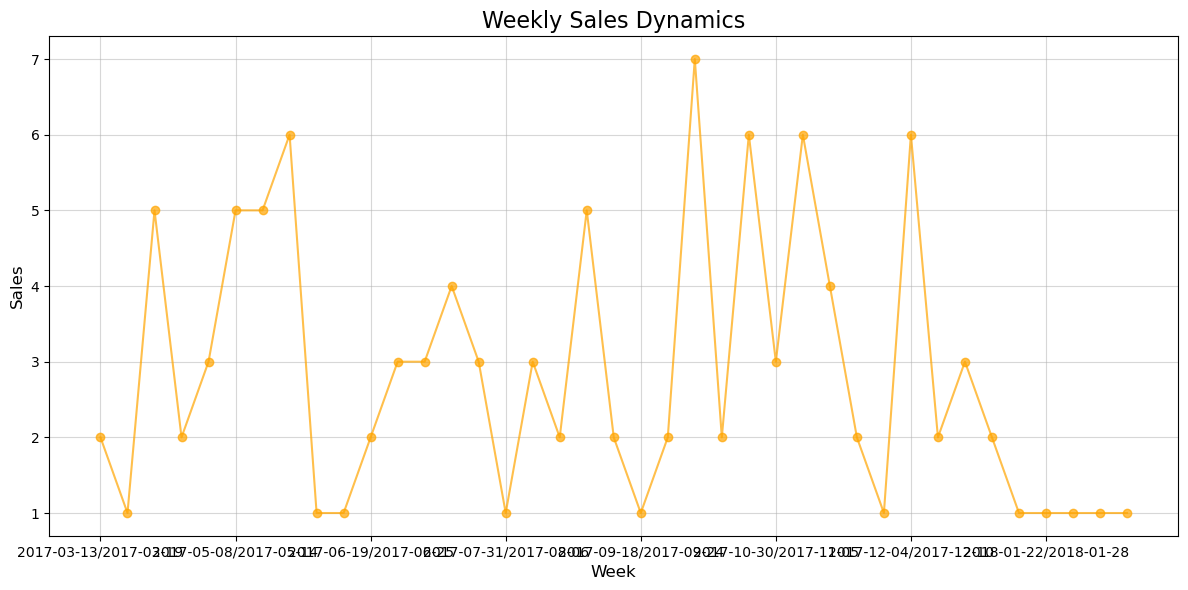

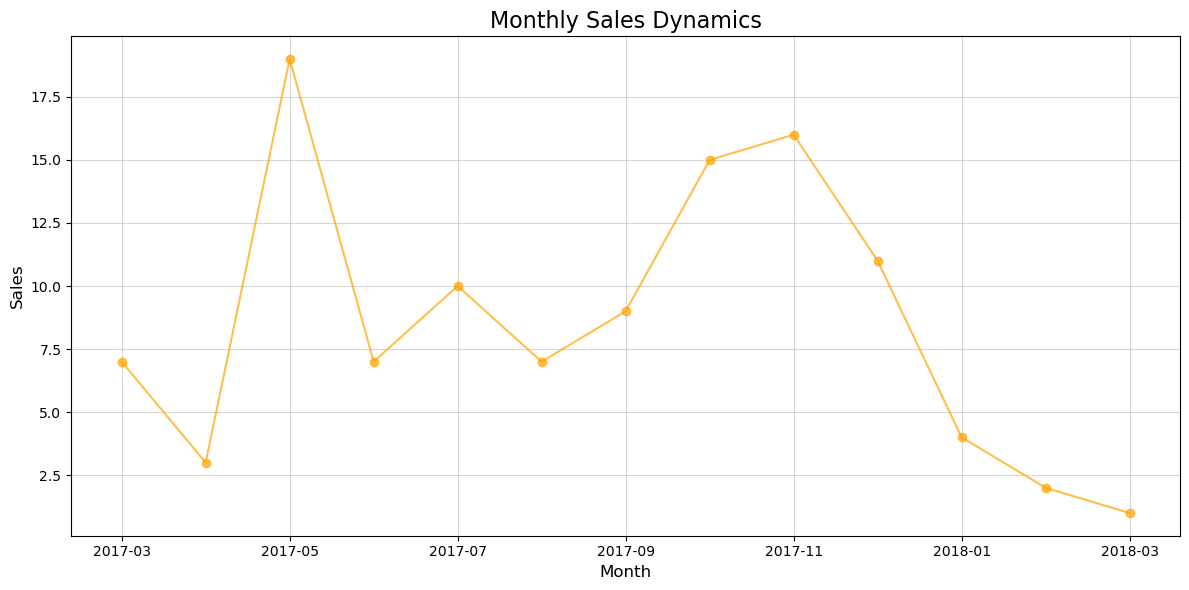

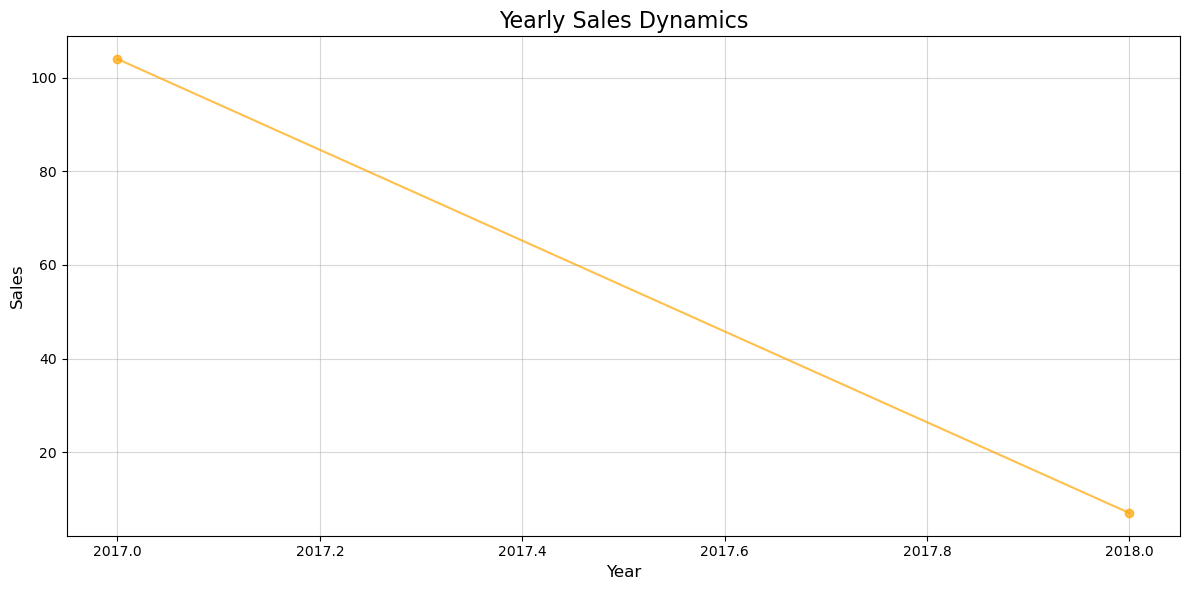

In [43]:
# Filtering data for the analyzed product
product_id_to_analyze = "08574b074924071f4e201e151b152b4e"
product_data = final_df[final_df['product_id'] == product_id_to_analyze]

# Main metrics
product_metrics_summary = {
    'Total Sales': product_data['order_item_id'].count(),
    'Total Revenue': product_data['price'].sum(),
    'Average Rating': product_data['review_score'].mean(),
    'Average Weight (g)': product_data['product_weight_g'].mean(),
    'Average Volume (cm3)': product_data['product_volume_cm3'].mean()
}

# Derive the main metrics for the analyzed product
metrics_df = pd.DataFrame([product_metrics_summary]).T
metrics_df.columns = ['Value']
print("Basic metrics for the product:")
print(metrics_df)


# Dynamic analysis (sales by period)
sales_by_day = product_data.groupby('day')['order_item_id'].count()
sales_by_week = product_data.groupby('week')['order_item_id'].count()
sales_by_month = product_data.groupby('month')['order_item_id'].count()
sales_by_year = product_data.groupby('year')['order_item_id'].count()


def plot_sales_dynamic(data, title, xlabel):
    plt.figure(figsize=(12, 6))
    data.plot(kind='line', marker='o', alpha=0.7)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()


# Charts of sales dynamics
plot_sales_dynamic(sales_by_day, 'Daily Sales Dynamics', 'Day')
plot_sales_dynamic(sales_by_week, 'Weekly Sales Dynamics', 'Week')
plot_sales_dynamic(sales_by_month, 'Monthly Sales Dynamics', 'Month')
plot_sales_dynamic(sales_by_year, 'Yearly Sales Dynamics', 'Year')

Conclusions:

This product has a high sales rate (111 units) and good revenue (10504.20).

The rating (4.1) is quite positive, but lower compared to products with an average rating of 5.

Weight and volume indicate that this is a medium-sized product.

#### Test correlation

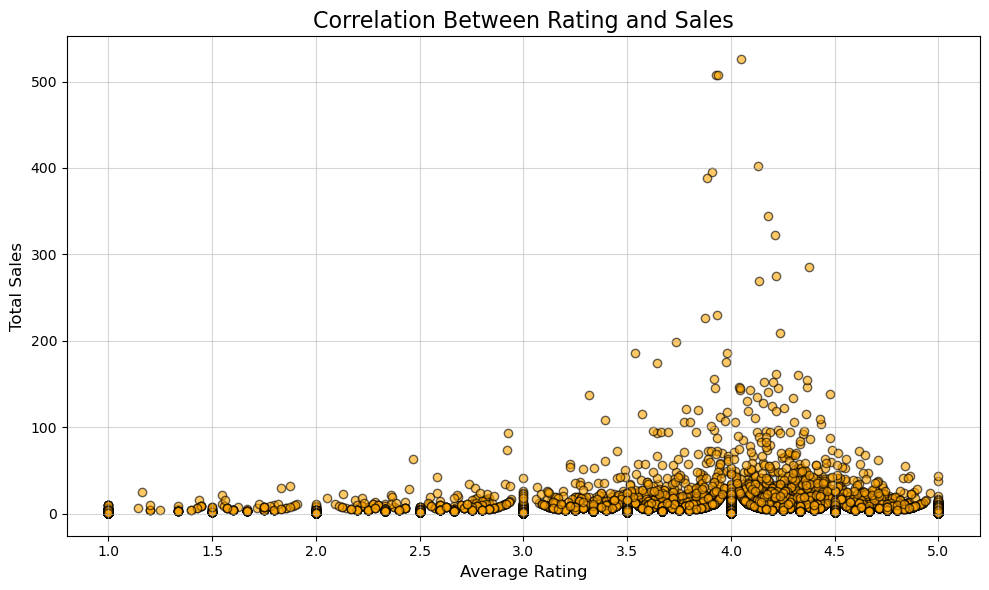

-0.010791071290848322

In [44]:
# Calculate average rating and number of sales for each product
rating_sales_data = final_df.groupby('product_id').agg({
    'review_score': 'mean',  # Average rating
    'order_item_id': 'count'  # Total number of sales
}).reset_index()
rating_sales_data.rename(columns={
                         'review_score': 'average_rating', 'order_item_id': 'total_sales'}, inplace=True)

# Analysis of correlation between average rating and number of sales
correlation = rating_sales_data[[
    'average_rating', 'total_sales']].corr().iloc[0, 1]

# Visualization of dependency
plt.figure(figsize=(10, 6))
plt.scatter(rating_sales_data['average_rating'],
            rating_sales_data['total_sales'], alpha=0.6, edgecolor='k')
plt.title('Correlation Between Rating and Sales', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# show result
correlation

Analysis results:

Correlation coefficient between average rating and number of sales: -0.0108

This indicates a very weak negative correlation (practically absent). In other words, the rating has almost no effect on the number of sales in this dataset.
Graph: Points on the graph do not show a clear relationship between the rating and the number of sales. This confirms the weak correlation.

#### Analysis of sales by months for the product

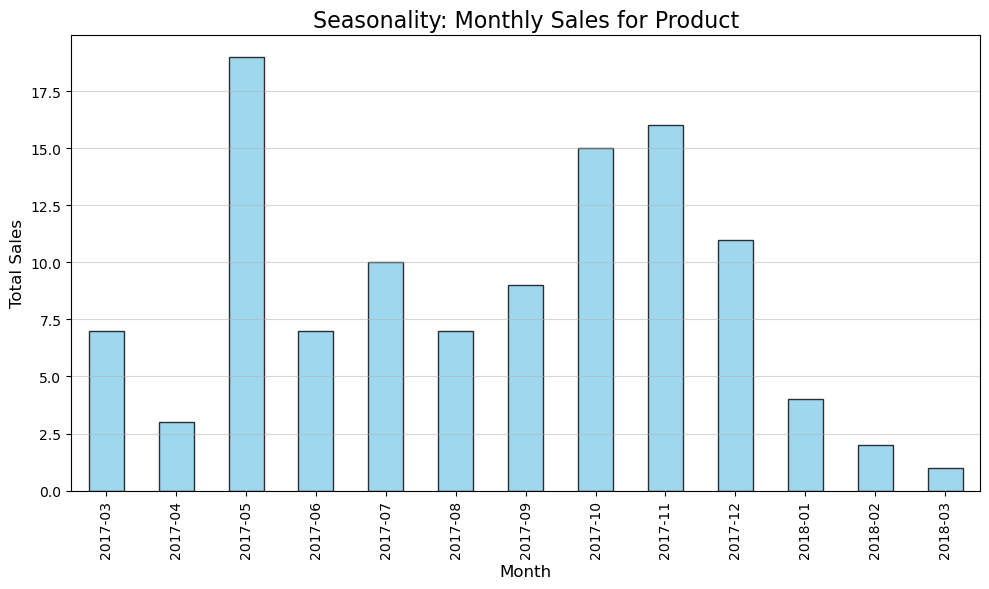

,Month,Total Sales
0,2017-03,7
1,2017-04,3
2,2017-05,19
3,2017-06,7
4,2017-07,10
5,2017-08,7
6,2017-09,9
7,2017-10,15
8,2017-11,16
9,2017-12,11


In [45]:
# Analysis of sales by months for the product
monthly_sales = product_data.groupby('month')['order_item_id'].count()

# Visualization of seasonality by month
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue', alpha=0.8, edgecolor='k')
plt.title('Seasonality: Monthly Sales for Product', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# Display sales data by month
monthly_sales.reset_index().rename(columns={'month': 'Month', 'order_item_id': 'Total Sales'})


Possible actions:

Consider marketing activities in the weakest months (for example, discounts in January-March).

Strengthen stocks before peak months (October-November).

Check whether these peaks coincide with advertising campaigns or holiday seasons.

#### T-test

<h3 style="background-color:#009bff; padding:10px; margin: auto 0; border-radius:8px; color:white; text-align:center; font-weight:bold;">
   T-test
</h3>

In [46]:
# Add price change simulation (e.g. 10% discount)
product_data['discounted_price'] = product_data['price'] * 0.9

# Division into two groups
group_a = product_data['price']
group_b = product_data['discounted_price']

# Sample size for group A (current price)
size_a = len(group_a)

# Sample size for group B (reduced price)
size_b = len(group_b)

# Metrics for comparison
average_sales_a = group_a.mean()
average_sales_b = group_b.mean()
total_revenue_a = group_a.sum()
total_revenue_b = group_b.sum()

# Statistical test (t-test for comparison of means)
t_stat, p_value = ttest_ind(group_a, group_b, equal_var=False)

# Test results
ab_test_results = {
    'Metric': ['Average Sales', 'Total Revenue', 'T-Statistic', 'P-Value'],
    'Group A (Current Price)': [average_sales_a, total_revenue_a, t_stat, p_value],
    'Group B (Discounted Price)': [average_sales_b, total_revenue_b, None, None]
}

# Show results
ab_test_results_df = pd.DataFrame(ab_test_results)
print("Results A/B-test for change the price:")
print(ab_test_results_df)

Results A/B-тесту для зміни ціни:
          Metric  Group A (Current Price)  Group B (Discounted Price)
0  Average Sales             9.463243e+01                   85.169189
1  Total Revenue             1.050420e+04                 9453.780000
2    T-Statistic             9.113795e+00                         NaN
3        P-Value             5.362278e-17                         NaN


**Conclusions:**

Reducing the price by 10% is not an effective strategy to increase income.

The demand for the product is not elastic enough to compensate for the loss of income from the price reduction.

#### Recommendations

Do not lower the price if the goal is to increase revenue.

Try other marketing strategies:

Additional shares (for example, "2 at 1").

Improve product visibility in the market.

Investigate customer behavior: Does demand depend on other factors such as seasonality or region.